# 1. Importing Libraries


In [106]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error,  r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and Exploring the Data

In [107]:
df = pd.read_csv('data/BostonHousing.csv')

In [108]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

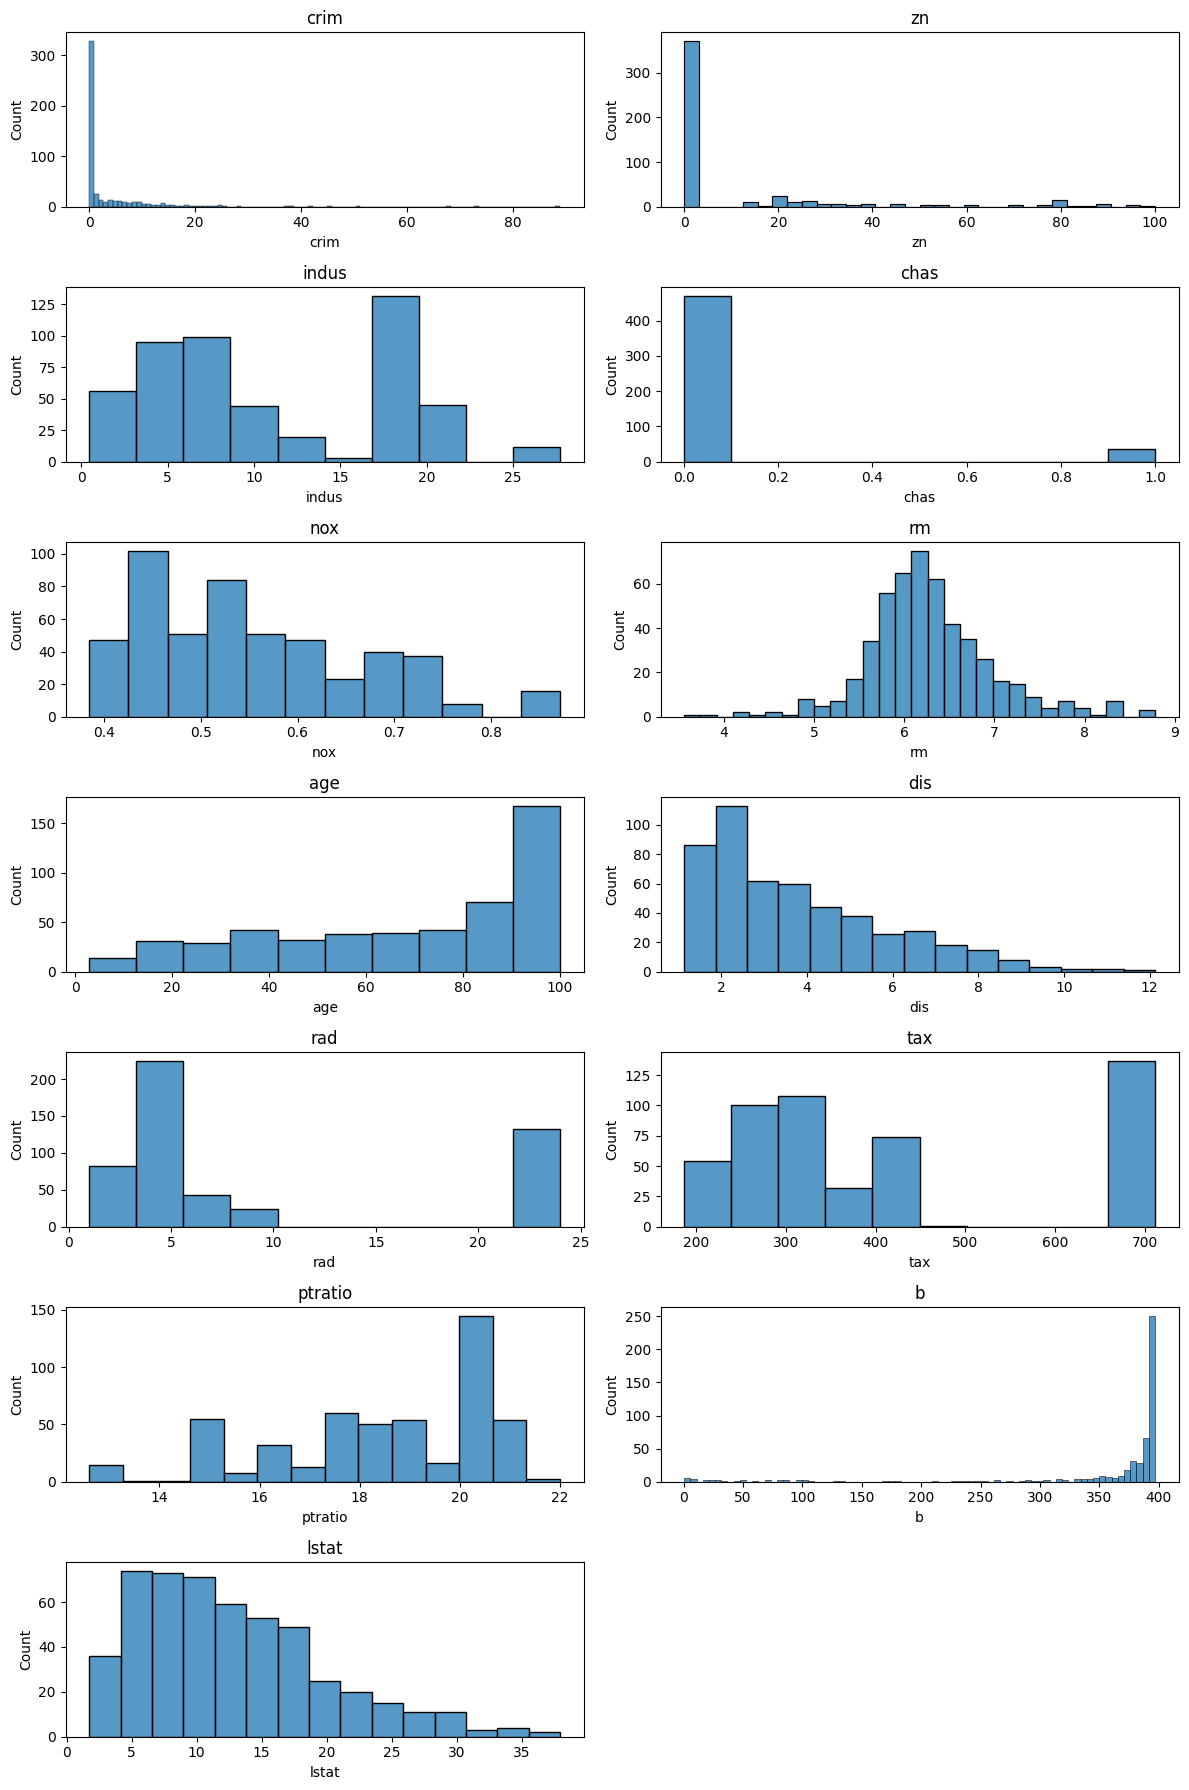

In [109]:
columnas = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
plt.figure(figsize=(12, 18))

for i, col in enumerate(columnas, 1):
    plt.subplot(len(columnas) // 2 + len(columnas) % 2, 2, i)
    sns.histplot(df[col].dropna(), kde=False)
    plt.title(col)

plt.tight_layout()
plt.show()

# 3. Data Cleaning and Preparation

In [110]:
df.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [212]:
best_features = [a for a, b in df.corr()['medv'].items() if abs(b) >= 0.35]

# 4. Scaling or Normalizing Data


# 5. Model Building and Training


In [213]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='medv'), df['medv'],test_size=0.25, random_state=42)

### Functions

In [214]:
metrics_list = []
def metrics(model, y_test, predictions):
    rmse = root_mean_squared_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    metrics_list.append([model,rmse,mse,r2])

In [215]:
def scatter_plot(y_test, predictions, model):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal
    plt.title(f'Scatter Plot - {model.__class__.__name__}')
    plt.xlabel('True Values')
    plt.ylabel('Predict Values')
    plt.grid(True)
    plt.show()

In [216]:
def residual_plot(y_test,predictions, model):
    residuos = [real - pred for real, pred in zip(y_test, predictions)]

    plt.figure(figsize=(8, 4))
    plt.scatter(predictions, residuos, color='blue', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')  # Línea en y=0
    plt.title(f'Residual plot  - {model.__class__.__name__}')
    plt.xlabel('Predict Values')
    plt.ylabel('Scraps')
    plt.grid(True)
    plt.show()

### DecisionTreeRegresor per default

In [217]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)
predictions_1 = model.predict(x_test)

metrics('DecisionTreeRegressor (per default)',y_test, predictions_1)

### DecisionTreeRegresor with GridSearch

In [218]:
params = {
    'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'max_depth': [2*x for x in range(2,10)],
    'min_samples_leaf': [4*x for x in range(5,15)],
    'min_samples_split': [4*x for x in range(5,10)]
}

grid_search=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error', n_jobs=5,cv=3,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'poisson', 'squared_error'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [20, 24, 28, 32, 36, 40, 44, 48,
                                              52, 56],
                         'min_samples_split': [20, 24, 28, 32, 36]},
             scoring='neg_mean_squared_error', verbose=1)

In [219]:
predictions_2 = grid_search.predict(x_test)
metrics('DecisionTreeRegressor with GridSearch', y_test, predictions_2)

# 6. Model Evaluation

In [220]:
pd.DataFrame(metrics_list, columns=['model','rmse','mse','r2'])

,model,rmse,mse,r2
0,DecisionTreeRegressor (per default),4.625928,21.399213,0.694415
1,DecisionTreeRegressor with GridSearch,4.244322,18.014272,0.742753


### Model 1: TreeRegressor per default

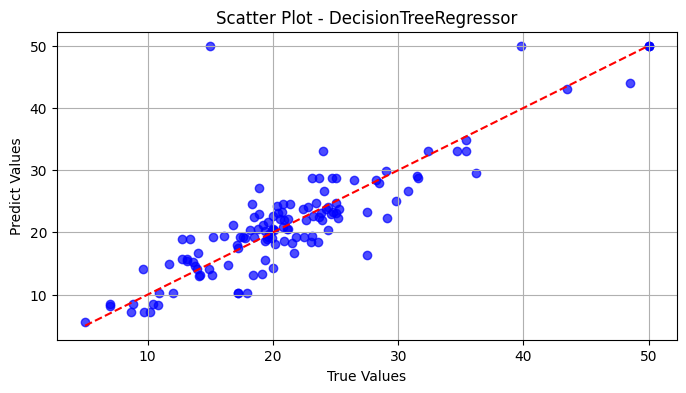

In [221]:
scatter_plot(y_test, predictions_1, model)

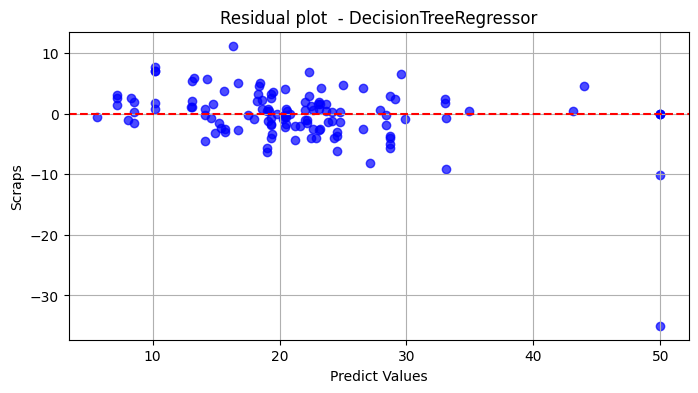

In [222]:
residual_plot(y_test,predictions_1, model)

### Model 2: TreeRegressor with GridSearch

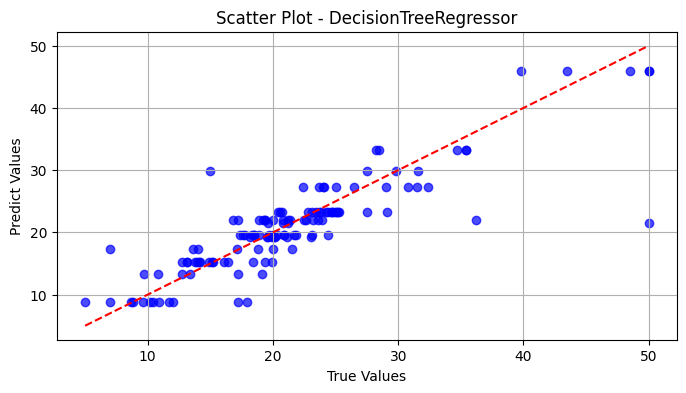

In [223]:
scatter_plot(y_test, predictions_2, model)

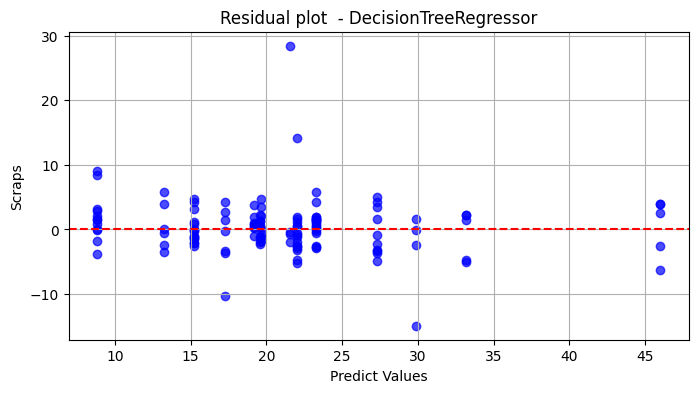

In [224]:
residual_plot(y_test,predictions_2, model)